In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import geopandas as gpd

ModuleNotFoundError: ignored

installing geopandas: https://colab.research.google.com/drive/1We-LMiSeucESsiB1tmvL9nZrntyWsri-#scrollTo=xIXl9KBOxVKE

In [6]:
import requests
import zipfile


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

    
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/data.zip', 'data.zip')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()
    
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

import pandas as pd
import numpy as np

# **SHAPE FILE**

In [8]:
shp = gpd.read_file('/content/drive/MyDrive/Youtube Tutorial/Matplotlib Tutorial/#1 plot unstructured grid/004_AddingShapefile/bali_and_java_for_ploting.shp')

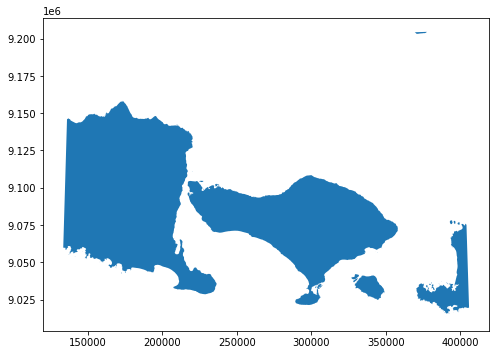

In [9]:
shp.plot(figsize=(8,12))

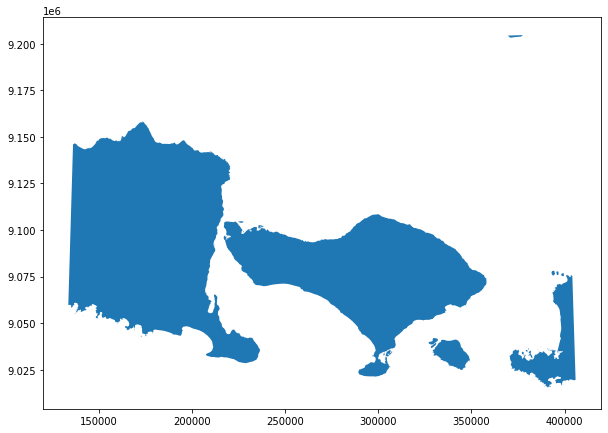

In [10]:
fig, ax = plt.subplots(figsize=(10,15))

shp.plot(ax=ax)

plt.show()

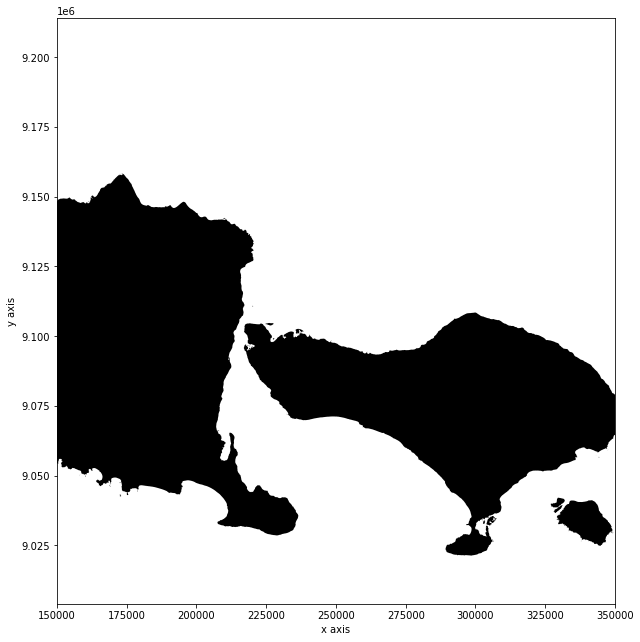

In [13]:
fig, ax = plt.subplots(figsize=(10,15))

shp.plot(ax=ax, color='black')

ax.set_xlim(150000, 350000)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

plt.show()

# **Overlay with Model Grid and Contour fill plot**

In [14]:
grid_point = pd.read_csv('/content/drive/MyDrive/Youtube Tutorial/Matplotlib Tutorial/#1 plot unstructured grid/004_Interpolation/grid_point.csv',header=None)
grid_triangle = pd.read_csv('/content/drive/MyDrive/Youtube Tutorial/Matplotlib Tutorial/#1 plot unstructured grid/004_Interpolation/grid_triangle.csv', header=None)
depth = pd.read_csv('/content/drive/MyDrive/Youtube Tutorial/Matplotlib Tutorial/#1 plot unstructured grid/004_Interpolation/grid_depth.csv',header=None)

In [15]:
depth = np.array(depth).reshape(-1)
grid_triangle = grid_triangle - 1

In [16]:
triang = mtri.Triangulation(grid_point[0], grid_point[1], triangles=grid_triangle)

In [17]:
xlim_min = 201000; xlim_max = 305000
ylim_min  = 8995900; ylim_max = 9130000

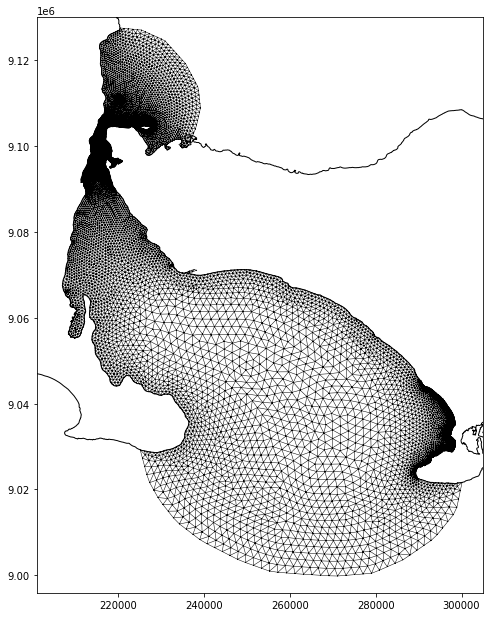

In [23]:
fig, ax = plt.subplots(figsize=(8,12))

shp.plot(ax=ax, color='white', edgecolor='black')
ax.triplot(triang, color='black', linewidth=0.5)

ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

plt.show()

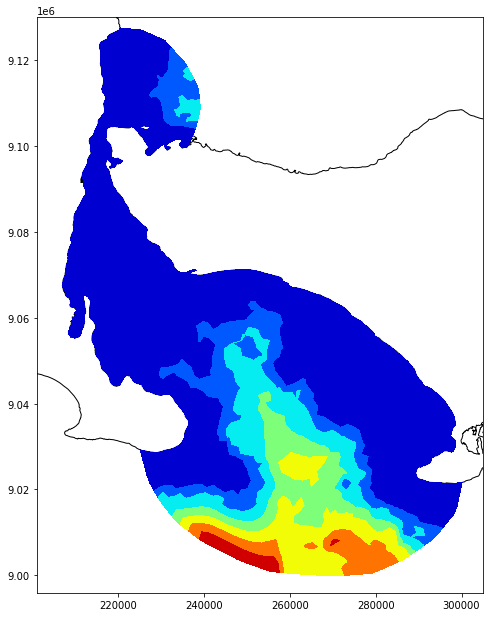

In [25]:
fig, ax = plt.subplots(figsize=(8,12))

shp.plot(ax=ax, color='white', edgecolor='black')
ax.tricontourf(triang, depth, cmap='jet')

ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

plt.show()

# **Finishing!**

In [28]:
north_arrow = plt.imread('/content/drive/MyDrive/Youtube Tutorial/Matplotlib Tutorial/#1 plot unstructured grid/004_AddingShapefile/north_arrow.png')

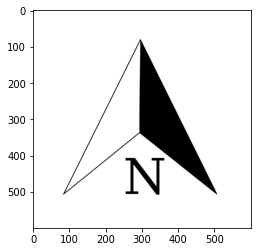

In [31]:
plt.imshow(north_arrow)
plt.show()

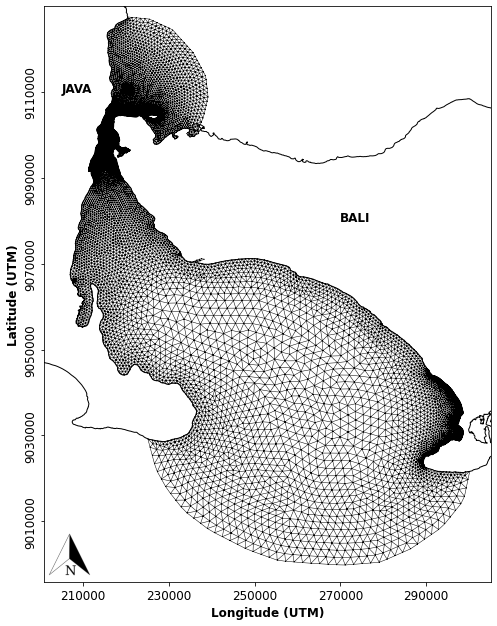

In [69]:
# create figure and axis object
fig, ax = plt.subplots(figsize=(8,12))

# shape file and grid model
shp.plot(ax=ax, edgecolor='k', color='white', linewidth=1)
ax.triplot(triang, color='black', linewidth=0.5)

# limit the x and y axis
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

# adding x and y axis label
ax.set_ylabel('Latitude (UTM)', fontweight='bold', fontsize=12)
ax.set_xlabel('Longitude (UTM)', fontweight='bold', fontsize=12)

# customize the y and x ticks label
ax.set_yticks(ticks=[9010000, 9030000, 9050000, 9070000, 9090000, 9110000])
ax.set_xticks(ticks=[210000, 230000, 250000, 270000, 290000])

# rotate the y ticks label and adjust the font size of both axis
ax.set_yticklabels(ax.get_yticks(), rotation=90, fontsize=12, va='center')
ax.set_xticklabels(ax.get_xticks(), fontsize=12)

# adding the north arrow
newax = fig.add_axes([0.12,0.1,0.1,0.2])
newax.imshow(north_arrow)
newax.axis('off')

# adding text
ax.text(270000, 9080000, 'BALI', fontweight='bold', fontsize=12)
ax.text(205000, 9110000, 'JAVA', fontweight='bold', fontsize=12)

# save the figure
fig.savefig('/content/drive/MyDrive/Youtube Tutorial/Matplotlib Tutorial/#1 plot unstructured grid/004_AddingShapefile/model_grid.png', dpi=200, bbox_inches='tight')

plt.show()

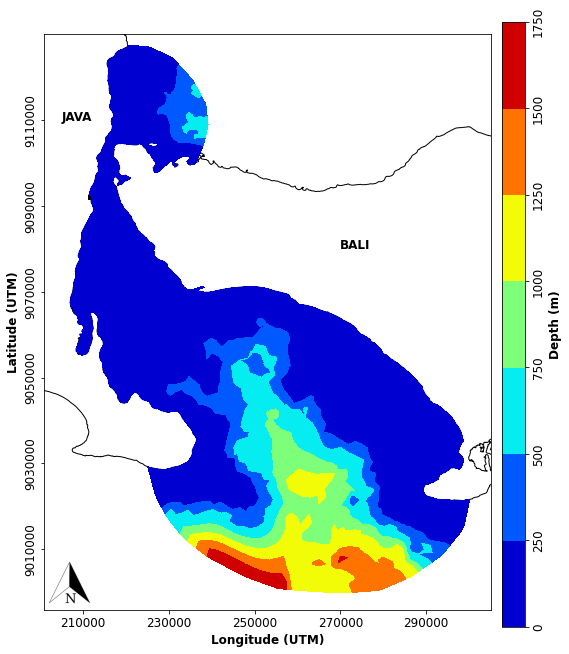

In [64]:
# create figure and axis object
fig, ax = plt.subplots(figsize=(8,12))

# shape file and grid model
shp.plot(ax=ax, edgecolor='k', color='white', linewidth=1)

# contour fill plot and create object for color bar
color = ax.tricontourf(triang, depth, cmap='jet')

# limit the x and y axis
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

# adding x and y axis label
ax.set_ylabel('Latitude (UTM)', fontweight='bold', fontsize=12)
ax.set_xlabel('Longitude (UTM)', fontweight='bold', fontsize=12)

# customize the y and x ticks label
ax.set_yticks(ticks=[9010000, 9030000, 9050000, 9070000, 9090000, 9110000])
ax.set_xticks(ticks=[210000, 230000, 250000, 270000, 290000])

# rotate the y ticks label and adjust the font size of both axis
ax.set_yticklabels(ax.get_yticks(), rotation=90, fontsize=12, va='center')
ax.set_xticklabels(ax.get_xticks(), fontsize=12)

# adding the north arrow
newax = fig.add_axes([0.12,0.1,0.1,0.2])
newax.imshow(north_arrow)
newax.axis('off')

# adding text
ax.text(270000, 9080000, 'BALI', fontweight='bold', fontsize=12)
ax.text(205000, 9110000, 'JAVA', fontweight='bold', fontsize=12)

# adding colorbar
cax = fig.add_axes([0.92, 0.15, 0.04, 0.7])
cbar = fig.colorbar(color, cax=cax, orientation='vertical')
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation='vertical', fontsize=12, va='center')
cbar.ax.set_ylabel('Depth (m)', fontweight='bold', fontsize=12)

plt.show()

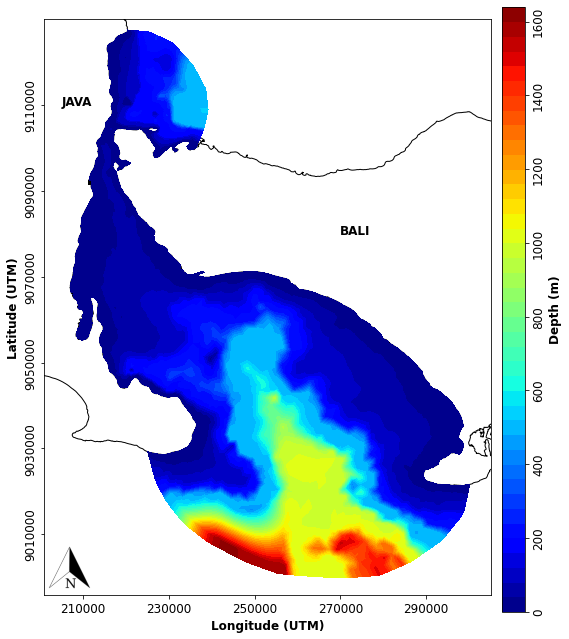

In [68]:
# create figure and axis object
fig, ax = plt.subplots(figsize=(8,12))

# shape file and grid model
shp.plot(ax=ax, edgecolor='k', color='white', linewidth=1)

# contour fill plot and create object for color bar
color = ax.tricontourf(triang, depth, cmap='jet', levels=50)

# limit the x and y axis
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

# adding x and y axis label
ax.set_ylabel('Latitude (UTM)', fontweight='bold', fontsize=12)
ax.set_xlabel('Longitude (UTM)', fontweight='bold', fontsize=12)

# customize the y and x ticks label
ax.set_yticks(ticks=[9010000, 9030000, 9050000, 9070000, 9090000, 9110000])
ax.set_xticks(ticks=[210000, 230000, 250000, 270000, 290000])

# rotate the y ticks label and adjust the font size of both axis
ax.set_yticklabels(ax.get_yticks(), rotation=90, fontsize=12, va='center')
ax.set_xticklabels(ax.get_xticks(), fontsize=12)

# adding the north arrow
newax = fig.add_axes([0.12,0.1,0.1,0.2])
newax.imshow(north_arrow)
newax.axis('off')

# adding text
ax.text(270000, 9080000, 'BALI', fontweight='bold', fontsize=12)
ax.text(205000, 9110000, 'JAVA', fontweight='bold', fontsize=12)

# adding colorbar
cax = fig.add_axes([0.92, 0.15, 0.04, 0.7])
cbar = fig.colorbar(color, cax=cax, orientation='vertical')
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation='vertical', fontsize=12, va='center')
cbar.ax.set_ylabel('Depth (m)', fontweight='bold', fontsize=12)

# save the figure
fig.savefig('/content/drive/MyDrive/Youtube Tutorial/Matplotlib Tutorial/#1 plot unstructured grid/004_AddingShapefile/model_depth.png', dpi=200, bbox_inches='tight')

plt.show()

# **THANK YOU**